In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

supplychain_data=pd.read_csv('./supply_chain_data.csv')
supplychain_data

,Product Type,SKU,Price,Availability,Number of Products Sold,Revenue Generated,Customer Demographics,Stock Levels,Lead Times,Order Quantities,...,Location,Lead Time,Production Volumes,Manufacturing Lead Time,Manufacturing Costs,Inspection Results,Defect Rates,Transportation Modes,Routes,Costs
0,Haircare,SKU0,69.8080,55,802,8661.9968,Male,58,7,96,...,Mumbai,29,215,29,46.2799,Pending,0.2264,Road,Route-B,187.7521
1,Skincare,SKU1,14.8435,95,736,7460.9001,Female,53,30,37,...,Mumbai,23,517,30,33.6168,Pending,4.8541,Road,Route-B,503.0656
2,Haircare,SKU2,11.3197,34,8,9577.7496,Female,1,10,88,...,Mumbai,12,971,27,30.6880,Pending,4.5806,Air,Route-C,141.9203
3,Skincare,SKU3,61.1633,68,83,7766.8364,Male,23,13,59,...,Kolkata,24,937,18,35.6247,Fail,4.7466,Rail,Route-A,254.7762
4,Skincare,SKU4,4.8055,26,871,2686.5052,Male,5,3,56,...,Delhi,5,414,3,92.0652,Fail,3.1456,Air,Route-A,923.4406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Haircare,SKU95,77.9039,65,672,7386.3639,Female,15,14,26,...,Mumbai,18,450,26,58.8907,Pending,1.2109,Air,Route-A,778.8642
96,Cosmetics,SKU96,24.4231,29,324,7698.4248,Male,67,2,32,...,Mumbai,28,648,28,17.8038,Pending,3.8720,Road,Route-A,188.7421
97,Haircare,SKU97,3.5261,56,62,4370.9166,Male,46,19,4,...,Mumbai,10,535,13,65.7652,Fail,3.3762,Road,Route-A,540.1324
98,Skincare,SKU98,19.7546,43,913,8525.9526,Female,53,1,27,...,Chennai,28,581,9,5.6047,Pending,2.9081,Rail,Route-A,882.1989


In [ ]:
#columns
supplychain_data.columns

Index(['Product Type', 'SKU', 'Price', 'Availability',
       'Number of Products Sold', 'Revenue Generated', 'Customer Demographics',
       'Stock Levels', 'Lead Times', 'Order Quantities', 'Shipping Times',
       'Shipping Carriers', 'Shipping Costs', 'Supplier Name', 'Location',
       'Lead Time', 'Production Volumes', 'Manufacturing Lead Time',
       'Manufacturing Costs', 'Inspection Results', 'Defect Rates',
       'Transportation Modes', 'Routes', 'Costs'],
      dtype='object')

In [ ]:
supplychain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product Type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of Products Sold  100 non-null    int64  
 5   Revenue Generated        100 non-null    float64
 6   Customer Demographics    100 non-null    object 
 7   Stock Levels             100 non-null    int64  
 8   Lead Times               100 non-null    int64  
 9   Order Quantities         100 non-null    int64  
 10  Shipping Times           100 non-null    int64  
 11  Shipping Carriers        100 non-null    object 
 12  Shipping Costs           100 non-null    float64
 13  Supplier Name            100 non-null    object 
 14  Location                 10

In [ ]:
supplychain_data.dtypes

Product Type                object
SKU                         object
Price                      float64
Availability                 int64
Number of Products Sold      int64
Revenue Generated          float64
Customer Demographics       object
Stock Levels                 int64
Lead Times                   int64
Order Quantities             int64
Shipping Times               int64
Shipping Carriers           object
Shipping Costs             float64
Supplier Name               object
Location                    object
Lead Time                    int64
Production Volumes           int64
Manufacturing Lead Time      int64
Manufacturing Costs        float64
Inspection Results          object
Defect Rates               float64
Transportation Modes        object
Routes                      object
Costs                      float64
dtype: object

In [4]:
"""
1.Data Cleaning and Pre-Processing
"""
#1A. Count of unique values in each column:
columns_to_check = ['Product Type', 'SKU', 'Price', 'Availability','Number of Products Sold', 'Revenue Generated', 'Customer Demographics','Stock Levels',
                    'Lead Times', 'Order Quantities', 'Shipping Times','Shipping Carriers', 'Shipping Costs', 'Supplier Name', 'Location','Lead Time',
                    'Production Volumes', 'Manufacturing Lead Time','Manufacturing Costs', 'Inspection Results',
                    'Defect Rates','Transportation Modes', 'Routes', 'Costs']

for column_name in columns_to_check:
    unique_values = supplychain_data[column_name].nunique()
    print(f"{column_name}, Number of Unique Values: {unique_values}\n")

Product Type, Number of Unique Values: 3

SKU, Number of Unique Values: 100

Price, Number of Unique Values: 100

Availability, Number of Unique Values: 63

Number of Products Sold, Number of Unique Values: 96

Revenue Generated, Number of Unique Values: 100

Customer Demographics, Number of Unique Values: 2

Stock Levels, Number of Unique Values: 65

Lead Times, Number of Unique Values: 29

Order Quantities, Number of Unique Values: 61

Shipping Times, Number of Unique Values: 10

Shipping Carriers, Number of Unique Values: 3

Shipping Costs, Number of Unique Values: 100

Supplier Name, Number of Unique Values: 5

Location, Number of Unique Values: 5

Lead Time, Number of Unique Values: 29

Production Volumes, Number of Unique Values: 96

Manufacturing Lead Time, Number of Unique Values: 30

Manufacturing Costs, Number of Unique Values: 100

Inspection Results, Number of Unique Values: 3

Defect Rates, Number of Unique Values: 100

Transportation Modes, Number of Unique Values: 4

Rou

In [5]:
#1B. Check for categorical and numerical columns.

import pandas as pd
# Checking for Categorical column
categorical_col = []
for i in supplychain_data.dtypes.index:
    if supplychain_data.dtypes[i] == 'object':
        categorical_col.append(i)
print("Categorical Columns: ", categorical_col)
print('\n')

# Check for numerical column:
numerical_col = []
for i in supplychain_data.dtypes.index:
    if supplychain_data[i].dtypes !='object':
        numerical_col.append(i)
print("Numerical Columns: ", numerical_col)


Categorical Columns:  ['Product Type', 'SKU', 'Customer Demographics', 'Shipping Carriers', 'Supplier Name', 'Location', 'Inspection Results', 'Transportation Modes', 'Routes']


Numerical Columns:  ['Price', 'Availability', 'Number of Products Sold', 'Revenue Generated', 'Stock Levels', 'Lead Times', 'Order Quantities', 'Shipping Times', 'Shipping Costs', 'Lead Time', 'Production Volumes', 'Manufacturing Lead Time', 'Manufacturing Costs', 'Defect Rates', 'Costs']


In [6]:
#1C. Check for Blank spaces in each column.
import pandas as pd
for col in ['Product Type', 'SKU', 'Price', 'Availability','Number of Products Sold', 'Revenue Generated', 'Customer Demographics','Stock Levels',
                    'Lead Times', 'Order Quantities', 'Shipping Times','Shipping Carriers', 'Shipping Costs', 'Supplier Name', 'Location','Lead Time',
                    'Production Volumes', 'Manufacturing Lead Time','Manufacturing Costs', 'Inspection Results',
                    'Defect Rates','Transportation Modes', 'Routes', 'Costs']:
    has_blank_space = supplychain_data[col].apply(lambda x: ' ' in str(x))
    print(f"Column: {col}, Contains Blank Spaces: {has_blank_space.any()}")

Column: Product Type, Contains Blank Spaces: False
Column: SKU, Contains Blank Spaces: False
Column: Price, Contains Blank Spaces: False
Column: Availability, Contains Blank Spaces: False
Column: Number of Products Sold, Contains Blank Spaces: False
Column: Revenue Generated, Contains Blank Spaces: False
Column: Customer Demographics, Contains Blank Spaces: False
Column: Stock Levels, Contains Blank Spaces: False
Column: Lead Times, Contains Blank Spaces: False
Column: Order Quantities, Contains Blank Spaces: False
Column: Shipping Times, Contains Blank Spaces: False
Column: Shipping Carriers, Contains Blank Spaces: False
Column: Shipping Costs, Contains Blank Spaces: False
Column: Supplier Name, Contains Blank Spaces: False
Column: Location, Contains Blank Spaces: False
Column: Lead Time, Contains Blank Spaces: False
Column: Production Volumes, Contains Blank Spaces: False
Column: Manufacturing Lead Time, Contains Blank Spaces: False
Column: Manufacturing Costs, Contains Blank Spaces:

In [7]:
#1D. Check for missing values in each column
import pandas as pd

supplychain_data = supplychain_data.dropna(subset=['Product Type', 'SKU', 'Price', 'Availability','Number of Products Sold', 'Revenue Generated', 'Customer Demographics','Stock Levels',
                    'Lead Times', 'Order Quantities', 'Shipping Times','Shipping Carriers', 'Shipping Costs', 'Supplier Name', 'Location','Lead Time',
                    'Production Volumes', 'Manufacturing Lead Time','Manufacturing Costs', 'Inspection Results',
                    'Defect Rates','Transportation Modes', 'Routes', 'Costs'])

missing_values = supplychain_data.isnull().sum()

# Display the result
print("Missing or null values in each column:")
print(missing_values)

Missing or null values in each column:
Product Type               0
SKU                        0
Price                      0
Availability               0
Number of Products Sold    0
Revenue Generated          0
Customer Demographics      0
Stock Levels               0
Lead Times                 0
Order Quantities           0
Shipping Times             0
Shipping Carriers          0
Shipping Costs             0
Supplier Name              0
Location                   0
Lead Time                  0
Production Volumes         0
Manufacturing Lead Time    0
Manufacturing Costs        0
Inspection Results         0
Defect Rates               0
Transportation Modes       0
Routes                     0
Costs                      0
dtype: int64


In [9]:
"""
2.Descriptive Analysis:Key statistics for numerical and categorical columns.
"""
# 2A. Statistics for Numerical Column
import pandas as pd
# Calculate mean, median, and standard deviation for numerical columns
supplychain_data.describe().round(3)

,Price,Availability,Number of Products Sold,Revenue Generated,Stock Levels,Lead Times,Order Quantities,Shipping Times,Shipping Costs,Lead Time,Production Volumes,Manufacturing Lead Time,Manufacturing Costs,Defect Rates,Costs
count,100.000,100.000,100.00,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000
mean,49.462,48.400,460.99,5776.048,47.770,15.960,49.220,5.750,5.548,17.080,567.840,14.770,47.267,2.277,529.246
std,31.168,30.743,303.78,2732.842,31.369,8.786,26.784,2.724,2.651,8.846,263.047,8.912,28.983,1.461,258.302
min,1.700,1.000,8.00,1061.618,0.000,1.000,1.000,1.000,1.014,1.000,104.000,1.000,1.085,0.019,103.916
25%,19.598,22.750,184.25,2812.847,16.750,8.000,26.000,3.750,3.540,10.000,352.000,7.000,22.983,1.010,318.778
50%,51.240,43.500,392.50,6006.352,47.500,17.000,52.000,6.000,5.321,18.000,568.500,14.000,45.906,2.142,520.430
75%,77.198,75.000,704.25,8253.977,73.000,24.000,71.250,8.000,7.602,25.000,797.000,23.000,68.621,3.564,763.078
max,99.171,100.000,996.00,9866.466,100.000,30.000,96.000,10.000,9.930,30.000,985.000,30.000,99.466,4.939,997.414


In [10]:
# 2B. Explore the distribution of categorical columns
import pandas as pd

categorical_cols = [
    'Product Type','Customer Demographics', 'Shipping Carriers',
    'Supplier Name', 'Location', 'Inspection Results', 'Transportation Modes', 'Routes'
]
for col in categorical_cols:
    print(f"\nDistribution of {col}:\n", supplychain_data[col].value_counts())


Distribution of Product Type:
 Product Type
Skincare     40
Haircare     34
Cosmetics    26
Name: count, dtype: int64

Distribution of Customer Demographics:
 Customer Demographics
Female    56
Male      44
Name: count, dtype: int64

Distribution of Shipping Carriers:
 Shipping Carriers
Carrier-B    43
Carrier-C    29
Carrier-A    28
Name: count, dtype: int64

Distribution of Supplier Name:
 Supplier Name
Supplier-1    27
Supplier-2    22
Supplier-5    18
Supplier-4    18
Supplier-3    15
Name: count, dtype: int64

Distribution of Location:
 Location
Kolkata      25
Mumbai       22
Chennai      20
Bangalore    18
Delhi        15
Name: count, dtype: int64

Distribution of Inspection Results:
 Inspection Results
Pending    41
Fail       36
Pass       23
Name: count, dtype: int64

Distribution of Transportation Modes:
 Transportation Modes
Road    29
Rail    28
Air     26
Sea     17
Name: count, dtype: int64

Distribution of Routes:
 Routes
Route-A    43
Route-B    37
Route-C    20
Name:

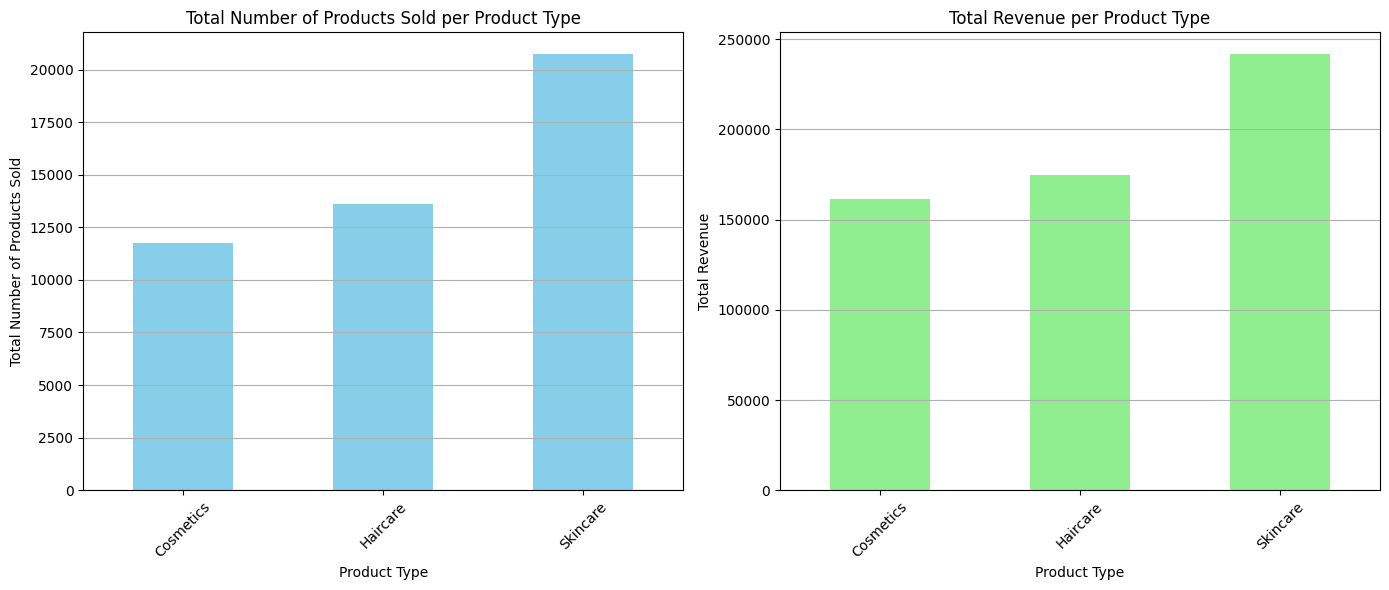

In [11]:
"""
3.Sales & Revenue Insights:
"""
import pandas as pd
import matplotlib.pyplot as plt

# Compute total number of products sold per product type
total_products_sold_per_product = supplychain_data.groupby('Product Type')['Number of Products Sold'].sum()

# Compute total revenue per product type
total_revenue_per_product = supplychain_data.groupby('Product Type')['Revenue Generated'].sum()


plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
total_products_sold_per_product.plot(kind='bar', color='skyblue')
plt.title('Total Number of Products Sold per Product Type')
plt.xlabel('Product Type')
plt.ylabel('Total Number of Products Sold')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.subplot(1, 2, 2)
total_revenue_per_product.plot(kind='bar', color='lightgreen')
plt.title('Total Revenue per Product Type')
plt.xlabel('Product Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


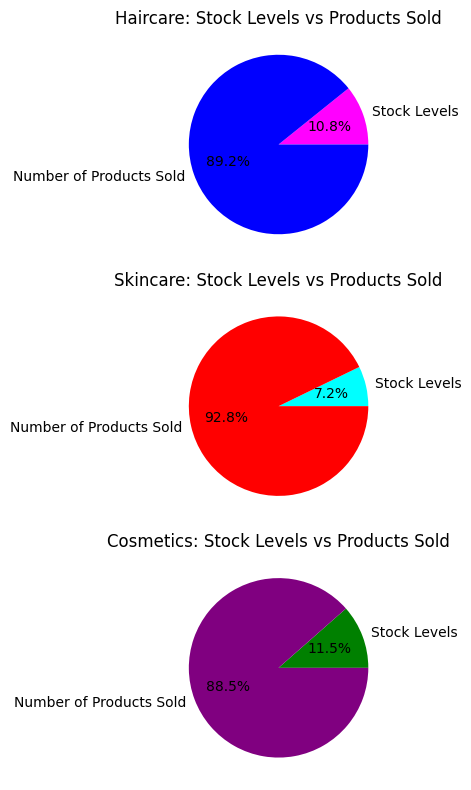

In [12]:
"""
4.Stock and Availability Analysis
"""
#it refers to tracking available stock (i.e) Stock Levels
import pandas as pd
import matplotlib.pyplot as plt

filtered_data = supplychain_data[supplychain_data['Product Type'].isin(['Skincare', 'Haircare', 'Cosmetics'])]

stock_sales = filtered_data.groupby('Product Type')[['Stock Levels', 'Number of Products Sold']].sum()

# Create a 1x3 subplot for three pie charts (one for each product type)
fig, axes = plt.subplots(3, 1, figsize=(15, 8))

# Haircare pie chart
axes[0].pie(stock_sales.loc['Haircare'], labels=['Stock Levels', 'Number of Products Sold'], autopct='%1.1f%%', colors=['magenta', 'blue'])
axes[0].set_title('Haircare: Stock Levels vs Products Sold')

# Skincare pie chart
axes[1].pie(stock_sales.loc['Skincare'], labels=['Stock Levels', 'Number of Products Sold'], autopct='%1.1f%%', colors=['cyan', 'red'])
axes[1].set_title('Skincare: Stock Levels vs Products Sold')

# Cosmetics pie chart
axes[2].pie(stock_sales.loc['Cosmetics'], labels=['Stock Levels', 'Number of Products Sold'], autopct='%1.1f%%', colors=['green', 'purple'])
axes[2].set_title('Cosmetics: Stock Levels vs Products Sold')

plt.tight_layout()
plt.show()


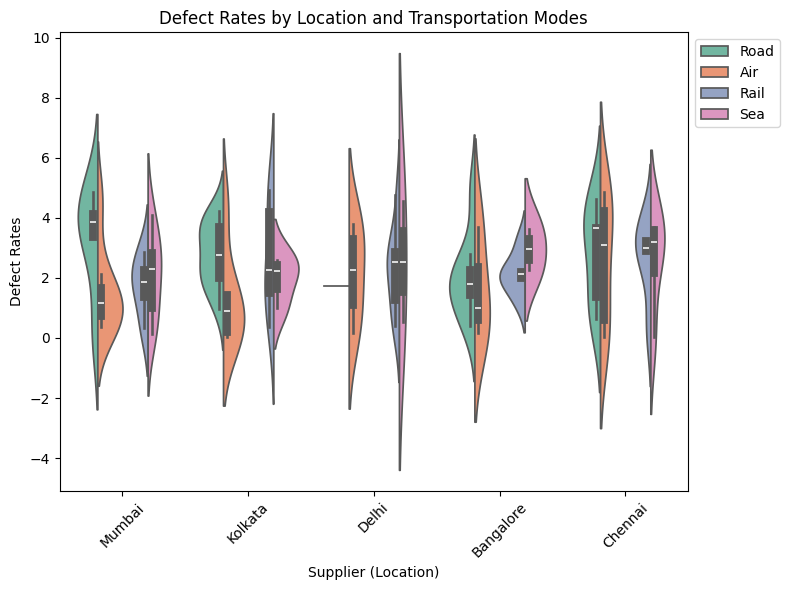

In [18]:
"""
5. Defect and Manufacturing Analysis:
"""
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Validate column names
supplychain_data = supplychain_data.dropna(subset=['Defect Rates'])

# Convert 'Defect Rates' column to numeric
supplychain_data['Defect Rates'] = pd.to_numeric(supplychain_data['Defect Rates'], errors='coerce')

grouped_data = supplychain_data.groupby(['Transportation Modes', 'Location'])['Defect Rates'].mean().reset_index()

# Create a violin plot
plt.figure(figsize=(8, 6))
# Fixing the column name in the y parameter
sns.violinplot(x='Location', y='Defect Rates', hue='Transportation Modes', data=supplychain_data, split=True, palette='Set2')

plt.title('Defect Rates by Location and Transportation Modes')
plt.xlabel('Supplier (Location)')
plt.ylabel('Defect Rates')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-19-ac2830ee8eaf>:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


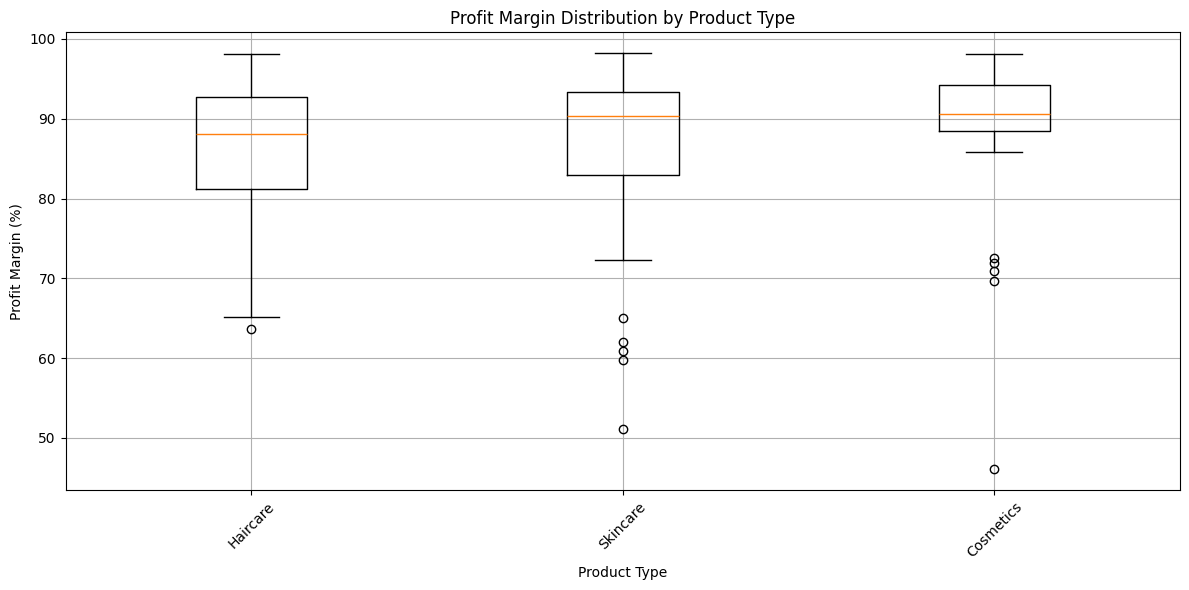

In [19]:
"""
6.Profitability Analysis
"""
import pandas as pd
import matplotlib.pyplot as plt


# Calculate Total Costs
supplychain_data['Total Costs'] = supplychain_data['Manufacturing Costs'] + supplychain_data['Shipping Costs']+supplychain_data['Costs']

# Calculate Profit Margin
supplychain_data['Profit Margin (%)'] = ((supplychain_data['Revenue Generated'] - supplychain_data['Total Costs']) / supplychain_data['Revenue Generated']) * 100

# Plot the boxplot
plt.figure(figsize=(12, 6))
plt.boxplot(
    [supplychain_data[supplychain_data['Product Type'] == p]['Profit Margin (%)'] for p in supplychain_data['Product Type'].unique()],
    labels=supplychain_data['Product Type'].unique()
)
plt.title('Profit Margin Distribution by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

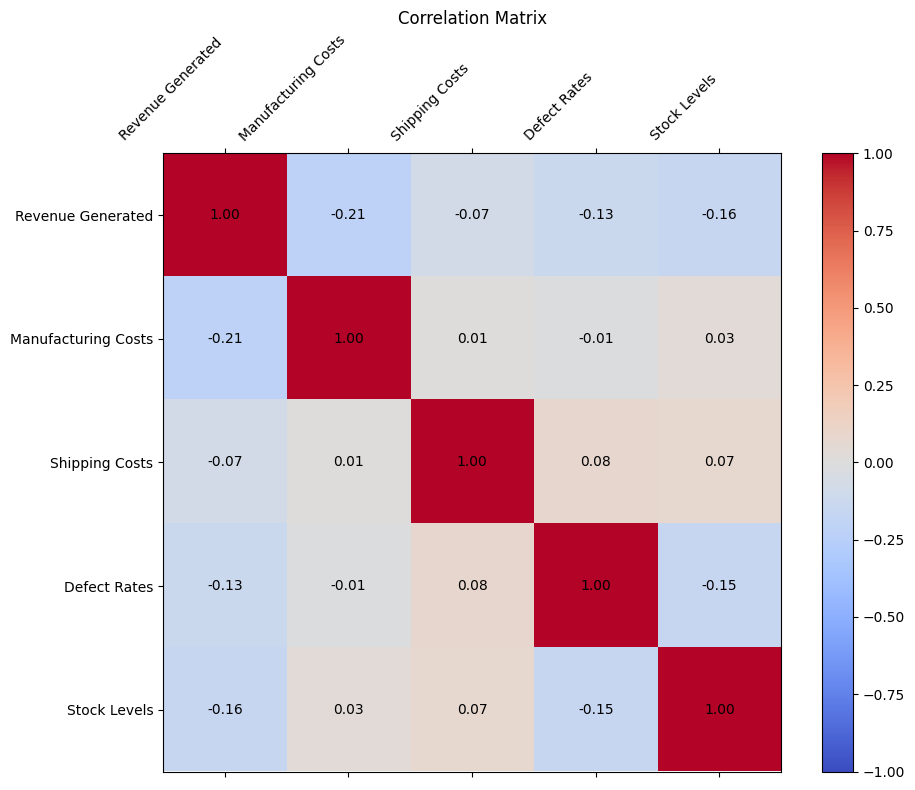

In [20]:
"""
7.Correlation analysis
"""
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv('supply_chain_data.csv')

# Compute the correlation matrix
correlation_matrix = data[['Revenue Generated', 'Manufacturing Costs', 'Shipping Costs', 'Defect Rates', 'Stock Levels']].corr()

# Plot the heatmap
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)

# Add color bar
fig.colorbar(cax)

# Add labels to the heatmap
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=45, ha='right')
ax.set_yticklabels(correlation_matrix.columns)

# Display the correlation values on the heatmap
for (i, j), val in np.ndenumerate(correlation_matrix.values):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

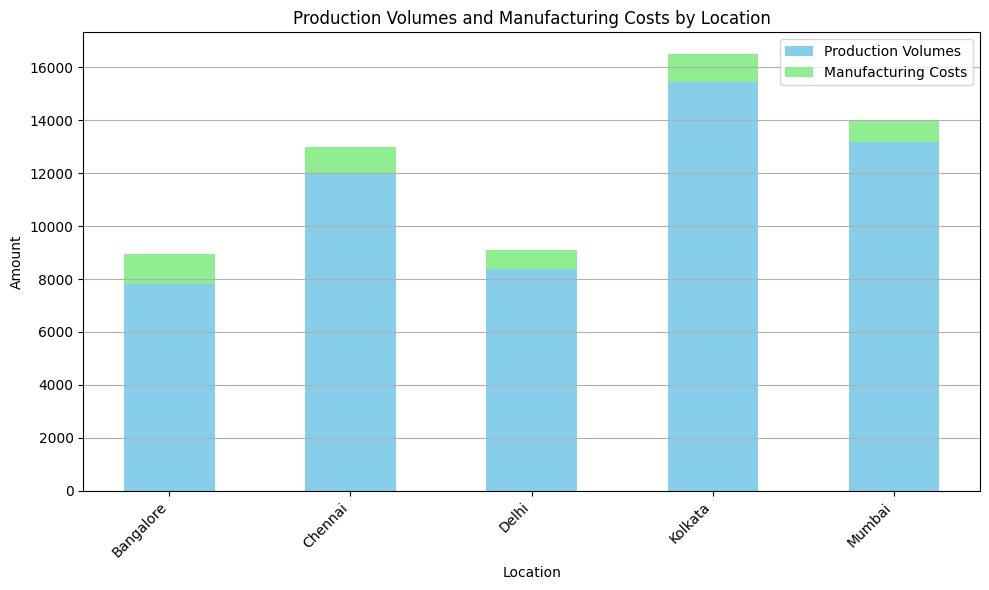

In [21]:
"""
8.Advanced Insights with Grouping
"""
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'Location' and aggregate production volumes and costs
grouped_data = supplychain_data.groupby('Location').agg({
    'Production Volumes': 'sum',
    'Manufacturing Costs': 'sum'
}).reset_index()

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Positions of the bars on the x-axis
index = range(len(grouped_data['Location']))

# Plot production volumes
bar1 = ax.bar(index, grouped_data['Production Volumes'], label='Production Volumes', color='skyblue',width=0.5)

# Plot manufacturing costs stacked on top of production volumes
bar2 = ax.bar(index, grouped_data['Manufacturing Costs'], bottom=grouped_data['Production Volumes'], label='Manufacturing Costs', color='lightgreen',width=0.5)

# Labeling the plot
ax.set_xlabel('Location')
ax.set_ylabel('Amount')
ax.set_title('Production Volumes and Manufacturing Costs by Location')
ax.set_xticks(index)
ax.set_xticklabels(grouped_data['Location'], rotation=45, ha='right')
ax.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Slope: -20.180785765738733
Intercept: 6729.927297191872
R-squared: 0.04580672829634669


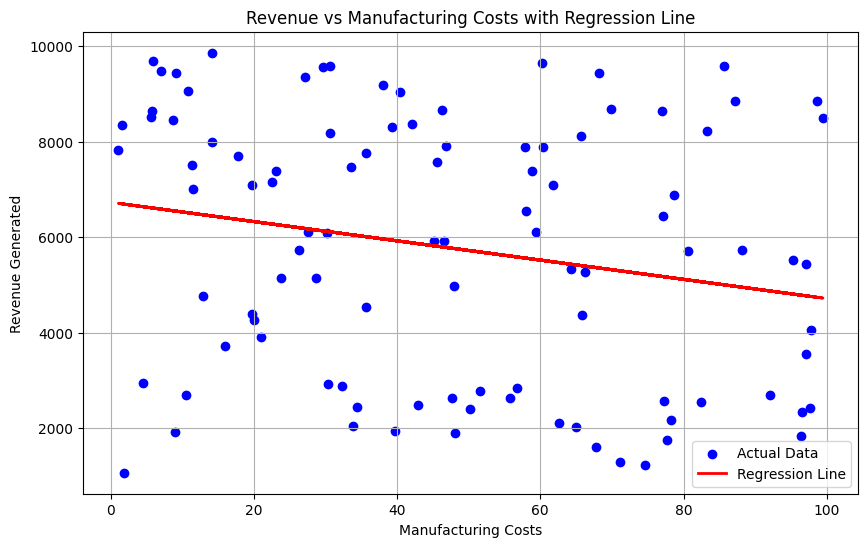

In [23]:
"""
9. Linear Regression (Predictive Analysis)
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the dependent and independent variables
X = supplychain_data['Manufacturing Costs']
y = supplychain_data['Revenue Generated']

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Calculate means
X_mean = np.mean(X)
y_mean = np.mean(y)

# Calculate the slope (b1) and intercept (b0)
numerator = np.sum((X - X_mean) * (y - y_mean))
denominator = np.sum((X - X_mean) ** 2)
slope = numerator / denominator
intercept = y_mean - (slope * X_mean)

# Predict y values
y_pred = intercept + slope * X

# Calculate R-squared
ss_total = np.sum((y - y_mean) ** 2)
ss_residual = np.sum((y - y_pred) ** 2)
r_squared = 1 - (ss_residual / ss_total)

# Print results
print(f'Slope: {slope}')
print(f'Intercept: {intercept}')
print(f'R-squared: {r_squared}')

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot of the actual data
plt.scatter(X, y, color='blue', label='Actual Data')

# Plot the regression line
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')

plt.xlabel('Manufacturing Costs')
plt.ylabel('Revenue Generated')
plt.title('Revenue vs Manufacturing Costs with Regression Line')
plt.legend()
plt.grid(True)
plt.show()